- 仿真代价函数：$f_i(x_i,\sigma(x))=2\|x_i-r_i\|^2+\|x_i - \sigma(x)\|^2$

$\sigma(x) = \frac{\sum x_i}{N} = \frac{\sum \phi(x_i)}{N}$

$\phi(x_i) = x_i$, $\nabla \phi = 1$

$\nabla_1 f = 200(x - r) + 2(x - \sigma)$

$\nabla_2 f = -2(x - \sigma)$

[ 4.  4.  2.  5. 10.]
[3. 7. 3. 9. 8.]
经过300轮迭代, 最终F(x)收敛到:  45.33333333458462
(x, y)走势图(x为起点, .为终点)


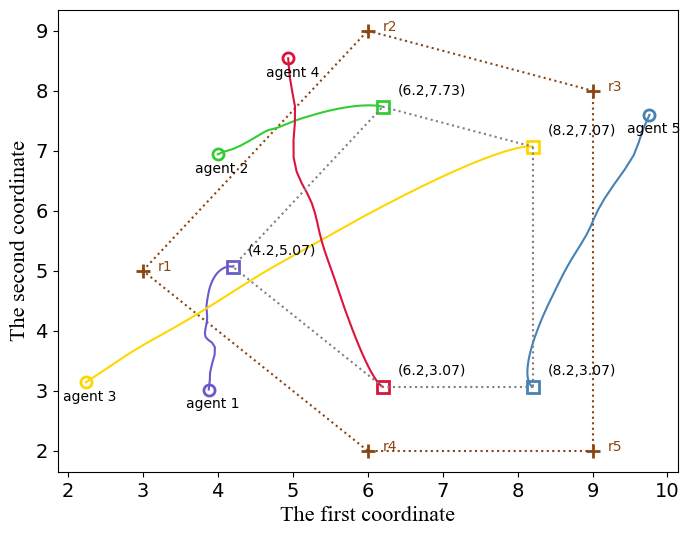

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# 常数
Iter_Num = 300
n = 5
alpha = 0.01
b = [
    [1/2, 0, 0, 1/2, 1/2],
    [1/2, 1/2, 0, 0, 0],
    [0, 1/2, 1/3, 0, 0],
    [0, 0, 1/3, 1/2, 0],
    [0, 0, 1/3, 0, 1/2]
]
b = np.array(b)

# 初始化
x = np.random.randint(1, 5, n) # x是(1, 5)的随机数
x = np.float64(x)
r = np.zeros(n)
v = np.ones(n)
s = x.copy()
y = x.copy()

# push-sum变量
u = np.zeros(n)
p = np.zeros(n)
w = np.zeros(n)
z = np.zeros(n)

# 辅助量
ans_x = [[] for i in range(n)] # 存每个点迭代过程中的x坐标  ans_x[i][tim]
ans_y = [[] for i in range(n)] # 存每个点迭代过程中的y坐标  ans_y[i][tim]
s_x = [[] for i in range(n)]
s_y = [[] for i in range(n)]
r1 = np.array([3.0, 6.0, 9.0, 6.0, 9.0]) # x坐标
r2 = np.array([5.0, 9.0, 8.0, 2.0, 2.0]) # y坐标
xx = x.copy()
vv = v.copy()
ss = s.copy()
yy = y.copy()
uu = u.copy()
pp = p.copy()
ww = w.copy()
zz = z.copy()

#------------------------------------------------------------------
def upd_v(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * v[j]
    vv[i] = sum

def upd_w(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * s[j]
    ww[i] = sum

def upd_z(i):
    zz[i] = ww[i] / vv[i]

def upd_s(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * s[j]
    ss[i] = sum + xx[i] - x[i]

def upd_u(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * y[j]
    uu[i] = sum

def upd_p(i):
    pp[i] = uu[i] / vv[i]

def upd_y(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * y[j]
    yy[i] = sum + (-2 * (xx[i] - ss[i])) - (-2 * (x[i] - s[i]))

def upd_x(i):
    xx[i] = x[i] - alpha * (4 * (x[i] - r[i]) + 2 * (x[i] - z[i]) + p[i])

def backup():
    global x, v, s, y, u, p, w, z
    x = xx.copy()
    v = vv.copy()
    s = ss.copy()
    y = yy.copy()
    u = uu.copy()
    p = pp.copy()
    w = ww.copy()
    z = zz.copy()

def init(op):
    global x, r, r1, r2, v, s, y, u, p, w, z
    global xx, vv, ss, yy, uu, pp, ww, zz
    # fixme: 可以把这里打开
    x = np.random.randint(2, 11, n)
    x = np.float64(x)
    print(x)
    if op == 1:
        r = r1
        # x[0] = 4.82
        # x[1] = 6.82
        # x[2] = 5.06
        # x[3] = 4.94
        # x[4] = 6.0
    else:
        r = r2
        # x[0] = 2.08
        # x[1] = 4.12
        # x[2] = 5.96
        # x[3] = 3.84
        # x[4] = 1.96
    v = np.ones(n)
    s = x.copy()
    # for i in range(n):
    #     s[i] = s[i] * s[i]
    y = -2 * (x - s)
    u = np.zeros(n)
    p = np.zeros(n)
    w = np.zeros(n)
    z = np.zeros(n)
    xx = x.copy()
    vv = v.copy()
    ss = s.copy()
    yy = s.copy()
    uu = u.copy()
    pp = p.copy()
    ww = w.copy()
    zz = z.copy()

# 算法迭代
def solve(iter_num):
    global r, ans_x, ans_y
    init(1)
    for T in range(iter_num):
        for i in range(n):
            upd_v(i)
            upd_x(i)
            upd_s(i)
            upd_y(i)
            upd_w(i)
            upd_u(i)
            upd_z(i)
            upd_p(i)
            ans_x[i].append(xx[i])
            s_x[i].append(zz[i])
        backup()
    init(2)
    for T in range(iter_num):
        for i in range(n):
            upd_v(i)
            upd_x(i)
            upd_s(i)
            upd_y(i)
            upd_w(i)
            upd_u(i)
            upd_z(i)
            upd_p(i)
            ans_y[i].append(xx[i])
            s_y[i].append(zz[i])
        backup()

# 计算仿真代价函数
def cal(iter_num):
    sum = 0
    sum_x, sum_y = 0, 0
    for i in range(n):
        sum_x += ans_x[i][iter_num-1]
        sum_y += ans_y[i][iter_num-1]
    sum_x /= n
    sum_y /= n
    for i in range(n):
        sum += 2 * ((ans_x[i][iter_num-1] - r1[i]) ** 2 + (ans_y[i][iter_num-1] - r2[i]) ** 2) + \
               ((ans_x[i][iter_num-1] - sum_x) ** 2 + (ans_y[i][iter_num-1] - sum_y) ** 2)
    return sum

tmp = Iter_Num
solve(tmp)
print('经过%d轮迭代, 最终F(x)收敛到: ' % tmp, cal(tmp))

col_lt1 = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
col_lt2 = ['tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

print('(x, y)走势图(x为起点, .为终点)')

import numpy as np
import matplotlib.pyplot as plt

# 设置颜色列表，调整橙色和红色，增加对比度
colors = ['#6A5ACD', '#32CD32', '#FFD700', '#DC143C', '#4682B4']  # agent的颜色
fixed_point_color = '#8B4513'  # 深棕色，用于固定点和标注r1, r2, ..., r5

# 设置标记符号，起点为空心圆，终点为空心方
start_markers = ['o', 'o', 'o', 'o', 'o']
end_markers = ['s', 's', 's', 's', 's']

# 绘制图像
plt.figure(figsize=(8, 6))
plt.xlabel('The first coordinate', fontsize=16, fontname='Times New Roman')
plt.ylabel('The second coordinate', fontsize=16, fontname='Times New Roman')

# 绘制固定点和连线
for i in range(n):
    plt.plot(r1[i], r2[i], marker='+', color=fixed_point_color, markersize=10, markeredgewidth=2)
    plt.text(r1[i] + 0.2, r2[i], f'r{i+1}', fontsize=10, color=fixed_point_color)

plt.plot([r1[0], r1[1]], [r2[0], r2[1]], color=fixed_point_color, linestyle='dotted')
plt.plot([r1[1], r1[2]], [r2[1], r2[2]], color=fixed_point_color, linestyle='dotted')
plt.plot([r1[2], r1[4]], [r2[2], r2[4]], color=fixed_point_color, linestyle='dotted')
plt.plot([r1[4], r1[3]], [r2[4], r2[3]], color=fixed_point_color, linestyle='dotted')
plt.plot([r1[3], r1[0]], [r2[3], r2[0]], color=fixed_point_color, linestyle='dotted')

# 绘制每个代理的轨迹
for i in range(n):
    # 轨迹线条
    plt.plot(ans_x[i], ans_y[i], color=colors[i], linewidth=1.5)
    
    # 起点标记为空心圆，并标记agent信息，文字为黑色
    plt.plot(ans_x[i][0], ans_y[i][0], marker=start_markers[i], color=colors[i], markersize=8, markeredgewidth=2, fillstyle='none')
    plt.text(ans_x[i][0] - 0.3, ans_y[i][0] - 0.3, f'agent {i+1}', fontsize=10, color='black')
    
    # 终点标记为空心方，并标记坐标信息，文字为黑色
    plt.plot(ans_x[i][-1], ans_y[i][-1], marker=end_markers[i], color=colors[i], markersize=8, markeredgewidth=2, fillstyle='none')
    plt.text(ans_x[i][-1] + 0.2, ans_y[i][-1] + 0.2, f'({round(ans_x[i][-1], 2)},{round(ans_y[i][-1], 2)})', fontsize=10, color='black')

# 添加连线
plt.plot([ans_x[0][-1], ans_x[1][-1]], [ans_y[0][-1], ans_y[1][-1]], color='gray', linestyle='dotted')
plt.plot([ans_x[1][-1], ans_x[2][-1]], [ans_y[1][-1], ans_y[2][-1]], color='gray', linestyle='dotted')
plt.plot([ans_x[2][-1], ans_x[4][-1]], [ans_y[2][-1], ans_y[4][-1]], color='gray', linestyle='dotted')
plt.plot([ans_x[4][-1], ans_x[3][-1]], [ans_y[4][-1], ans_y[3][-1]], color='gray', linestyle='dotted')
plt.plot([ans_x[3][-1], ans_x[0][-1]], [ans_y[3][-1], ans_y[0][-1]], color='gray', linestyle='dotted')

# 设置刻度大小
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 保存并显示图像
plt.savefig('fig4.pdf', bbox_inches='tight')
plt.show()

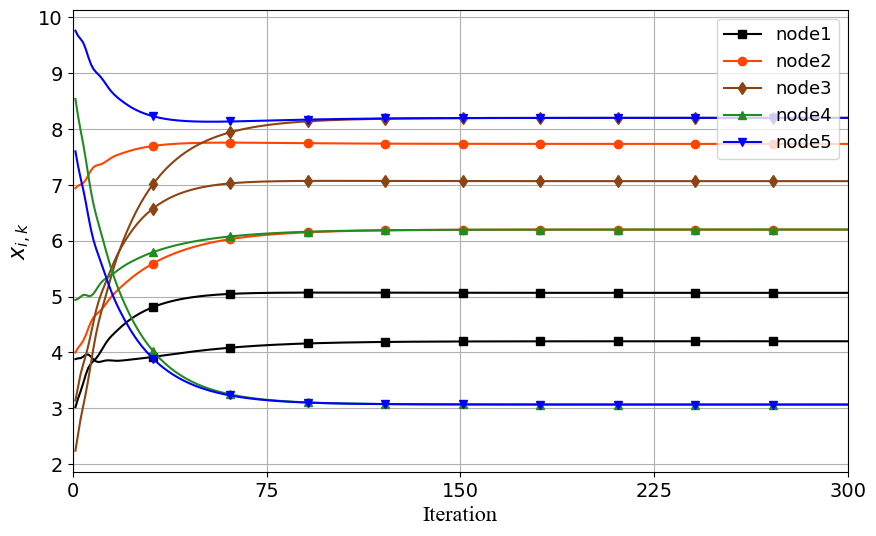

In [130]:
import matplotlib.pyplot as plt
import numpy as np

# 假设你已经有了 ans_x 和 ans_y 的数据

# 设置画布尺寸
plt.rcParams['figure.figsize'] = (10, 6)

# 设置x/y坐标的走势图标题
plt.ylabel('$x_i^k$', fontsize=16, fontname='Times New Roman')

# 定义标记符号和颜色
markers = ['s', 'o', 'd', '^', 'v', '<', '>']
colors = ['black', 'orangered', 'saddlebrown', 'forestgreen', 'blue', 'brown', 'olive']

# 截取合适长度的标记符号和颜色列表
markers = markers[0:n]
colors = colors[0:n]

# 设置索引
index = 0

# 绘制每条曲线，跳过第一个标记点
for i in range(n):
    # 生成标记点位置列表，跳过第一个位置
    interval = int(Iter_Num / 10)
    markevery = list(range(interval, Iter_Num, interval))
    
    plt.plot(range(1, Iter_Num + 1), ans_x[i], linestyle='-', linewidth=1.5, markersize=6, 
             markevery=markevery, marker=markers[index], color=colors[index], label=f'node{i+1}')
    plt.plot(range(1, Iter_Num + 1), ans_y[i], linestyle='-', linewidth=1.5, markersize=6, 
             markevery=markevery, marker=markers[index], color=colors[index])
    index += 1

# 添加图例并设置位置
plt.legend(loc="upper right", fontsize=13)

# 启用网格
plt.grid(True)

# 设置x轴和y轴标签及字体
plt.xlabel('Iteration', fontsize=16, fontname='Times New Roman')
plt.ylabel(r'$x_{i,k}$', fontsize=16, fontname='Times New Roman')

# 设置x轴刻度范围和间隔
x_ticks = np.linspace(0, Iter_Num, 5)
plt.xticks(x_ticks, fontsize=14)

# 设置y轴刻度字体大小
plt.yticks(fontsize=14)

# 设置x轴显示范围
plt.xlim(0, Iter_Num)

# 保存图像为PDF文件
plt.savefig('fig5.pdf', bbox_inches='tight')

# 显示绘制的图像
plt.show()

6.5999894729199005 5.200004565444177


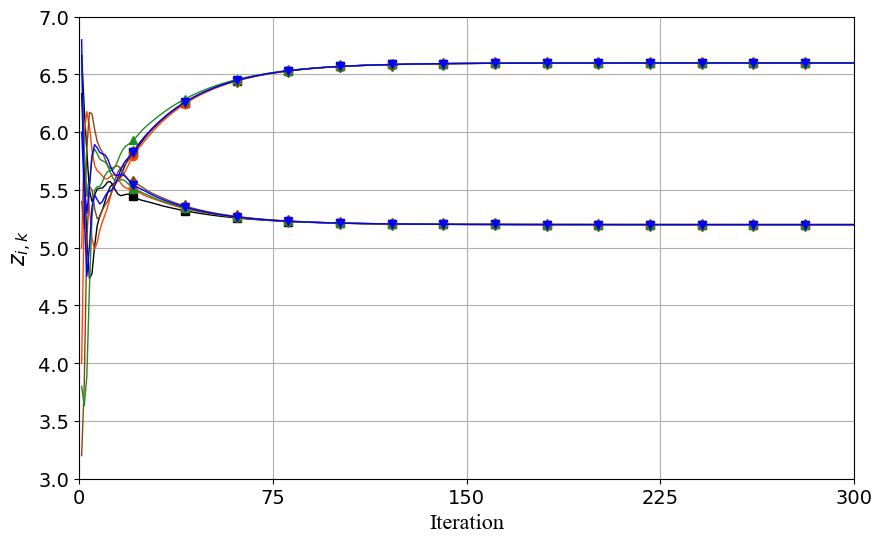

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 s_x 和 s_y 是已经生成的数据
# 例如：
# s_x = np.random.rand(5, 300)
# s_y = np.random.rand(5, 300)
# Iter_Num 和 n 已定义

print(s_x[0][Iter_Num-1], s_y[0][Iter_Num-1])

# 设置画布尺寸
plt.rcParams['figure.figsize'] = (10, 6)

# 设置 y 轴标签
plt.ylabel(r'$\sigma_i^k$', fontsize=16, fontname='Times New Roman')

# 定义标记符号和颜色，分开为 x 和 y 使用不同颜色
markers = ['s', 'o', 'd', '^', 'v']  # 标记符号与您的需求一致
colors = ['black', 'orangered', 'saddlebrown', 'forestgreen', 'blue']  # 修改后的颜色

# 绘制每条曲线
for i in range(n):
    # 生成标记点位置列表，跳过第一个位置
    interval = int(Iter_Num / 15)
    markevery = list(range(interval, Iter_Num, interval))
    
    plt.plot(range(1, Iter_Num + 1), s_x[i], linestyle='-', linewidth=1.0, markersize=6, 
             markevery=markevery, marker=markers[i], color=colors[i], label=f'node {i+1}')
    plt.plot(range(1, Iter_Num + 1), s_y[i], linestyle='-', linewidth=1.0, markersize=6, 
             markevery=markevery, marker=markers[i], color=colors[i])

# 启用网格
plt.grid(True)

# 设置x轴和y轴标签及字体
plt.xlabel('Iteration', fontsize=16, fontname='Times New Roman')
plt.ylabel(r'$z_{i,k}$', fontsize=16, fontname='Times New Roman')

# 设置x轴刻度范围和间隔
x_ticks = np.linspace(0, Iter_Num, 5)
plt.xticks(x_ticks, fontsize=14)

# 设置y轴刻度范围和字体大小
plt.ylim(3, 7)  # 根据您的数据适当调整
plt.yticks(fontsize=14)

# 设置x轴显示范围
plt.xlim(0, Iter_Num)

# 添加图例
# plt.legend(loc="upper right", fontsize=13)

# 保存图像为PDF文件
plt.savefig('fig6.pdf', bbox_inches='tight')

# 显示绘制的图像
plt.show()

In [132]:
# # 检验z的收敛性
# sum = 0
# for i in range(n):
#     sum += (ans_y[i][tmp-1])
# print(sum / n)
# for i in range(n):
#     print(z[i])

# # 检验p的收敛性
# sum = 0
# for i in range(n):
#     sum += ans_y[i][tmp-1]
# sum /= n
# print(2 * (sum - 5))
# for i in range(n):
#     print(p[i])

[ 4.  4.  2.  5. 10.]
[3. 7. 3. 9. 8.]